In [5]:
%pylab inline
import seaborn as sns
import pandas as pd
import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


In [6]:
def beautify_fig(fig_num, estimate_a=False):
    plt.figure(fig_num, figsize=(12, 6))
    plt.xticks(rotation = 35,size=15)
    plt.yticks(size=15)
    plt.xlabel('Ground truth a,b',size=15)
    plt.axvline(x=2.5, linestyle = '--',c='black')
    plt.axvline(x=5.5, linestyle = '--',c='black')
    plt.axvline(x=8.5, linestyle = '--',c='black')
    if estimate_a == False:
        plt.text(0.2,10**-7.7,'Mean s=' + r'$10^{-5}$',size=15)
        plt.text(3.2,10**-7.7,'Mean s=' + r'$10^{-4}$',size=15)
        plt.text(6.2,10**-7.7,'Mean s=' + r'$10^{-3}$',size=15)
        plt.text(9.2,10**-7.7,'Mean s=' + r'$10^{-2}$',size=15)
    else:
        plt.text(0.2,-0.35,'Mean s=' + r'$10^{-5}$',size=15)
        plt.text(3.2,-0.35,'Mean s=' + r'$10^{-4}$',size=15)
        plt.text(6.2,-0.35,'Mean s=' + r'$10^{-3}$',size=15)
        plt.text(9.2,-0.35,'Mean s=' + r'$10^{-2}$',size=15)
    
    plt.xlabel("Ground truth a,b", labelpad=30, size=15)
    plt.legend(bbox_to_anchor=(1.01, 1.01))

In [7]:
# PLot validation of each optimal allele in a period together

def main():
    
    print('Running main')
    
    means = [10**-5, 10**-4, 10**-3, 10**-2] 
    pers = [2,3,4]
    opt_dic = {}
    opt_dic[2] = [11,20]
    opt_dic[3] = [5,8]
    opt_dic[4] = [7,10]
    
    folder = 't36'
    fig_num = 0
    
    fig_num = fig_num + 1
    dic = {}
    dic['Period, Optimal allele'] = []
    dic['Ground truth a,b'] = []
    dic['Estimated mean s'] = []
    dic['Estimated a'] = []
    dic['Estimated b'] = []
    
    b_vals = []
    for per in pers:
        
        for opt in opt_dic[per]:
            
            for mean in means:
                
                for j in range(0,3):

                    file_list = glob.glob('./results/validation_multiple_one_opt/%s/per_%d_opt_%d_*_%.5f.txt'%(folder, per, opt, mean)) 
                    file_list.sort()
                       
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    line = lines[1]
                    info = line.strip().split(' ')
                    k = float(info[7])
                    theta = float(info[10])
                    if theta not in b_vals:
                        b_vals.append(theta)
                    line = lines[6]       
                    info = line.strip().split(': ')
                    
                    params = info[1]
                    params = params.strip().split('), ')
                    
                    i = 0
                    for param in params:
                        i = i + 1
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        
                        dic['Period, Optimal allele'].append('Per %d Opt %d'%(per, opt))
                        dic['Estimated mean s'].append(float(param[0]))
                        dic['Ground truth a,b'].append('(%.1E,%.1E)'%(k,theta))
                        dic['Estimated a'].append(float(param[1]))
                        dic['Estimated b'].append(float(param[2]))
        
    df = pd.DataFrame(data=dic)
        
    # Plot estimated mean s
    plt.figure(fig_num, figsize=(12, 6))
    sns.swarmplot(x="Ground truth a,b", y="Estimated mean s", hue="Period, Optimal allele", data=df, palette=['deepskyblue','blue','lightgreen','green','lightpink','deeppink'])
    plt.yscale('log')
    plt.ylabel('Estimated mean s',size=15)
    plt.ylim(10**-6, 0.1)
    plt.title('Joint method validation of estimated mean s',size=15)
    beautify_fig(fig_num)
    #plt.savefig(PLOTDIR + '%s/per_%d.pdf'%(folder, per),bbox_inches='tight')
        
    # Plot estimated a (shape parameter)
    fig_num = fig_num + 1
    plt.figure(fig_num, figsize=(12, 6))
    sns.swarmplot(x="Ground truth a,b", y="Estimated a", hue="Period, Optimal allele", data=df, palette=['deepskyblue','blue','lightgreen','green','lightpink','deeppink'])
    plt.ylabel('Estimated a',size=15)
    plt.ylim(0,1)
    plt.title('Joint method validation of estimated a (shape parameter)',size=15)
    a_vals = [0.2, 0.3, 0.6] * 4
    for i in range(0, len(a_vals)):
        plt.plot(i, a_vals[i], marker='*', markersize=20, c = 'black', zorder=10) 
    beautify_fig(fig_num, True)
        
    # Plot estimated b (scale parameter)
    fig_num = fig_num + 1
    plt.figure(fig_num, figsize=(12, 6))
    sns.swarmplot(x="Ground truth a,b", y="Estimated b", hue="Period, Optimal allele", data=df, palette=['deepskyblue','blue','lightgreen','green','lightpink','deeppink'])
    plt.ylabel('Estimated b',size=15)
    plt.yscale('log')
    plt.ylim(10**-6,0.1)
    plt.title('Joint method validation of estimated b (scale parameter)',size=15)
    for i in range(0, len(a_vals)):
        plt.plot(i, b_vals[i], marker='*', markersize=20, c = 'black', zorder=10) 
    beautify_fig(fig_num)

Running main
CPU times: user 8.02 s, sys: 43.4 ms, total: 8.06 s
Wall time: 9.15 s


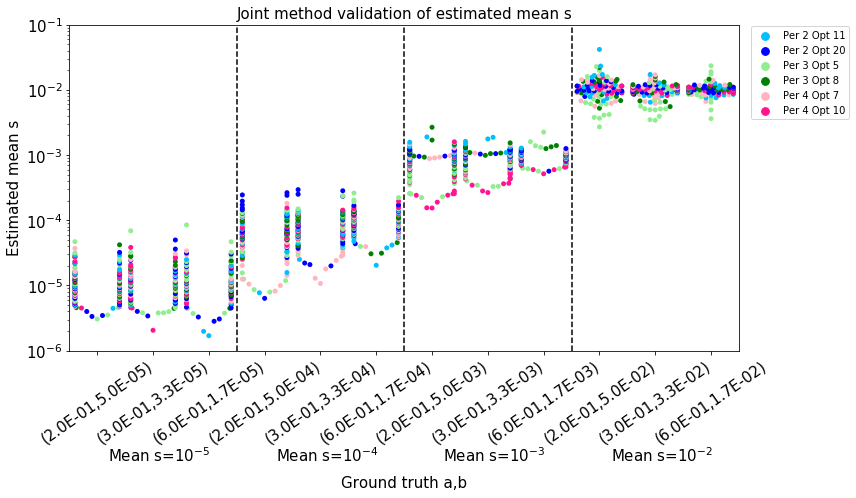

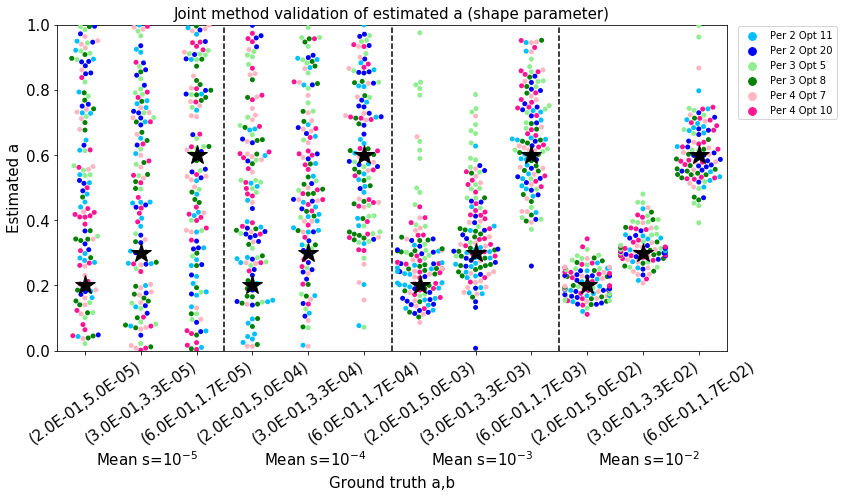

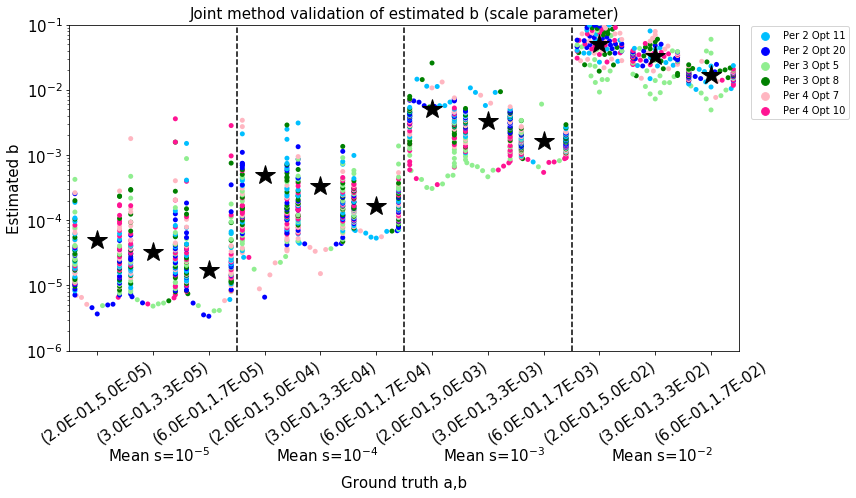

In [8]:
%%time
if __name__ == '__main__':
    main()